In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('max_colwidth', 800)

In [2]:
results = [file for file in os.listdir('/home/will/Downloads/qm_0728_hyper1/0728_hyper1/') if 'result' in file]
df_list = []
for result in results:
    df = pd.read_csv('/home/will/Downloads/qm_0728_hyper1/0728_hyper1/'+result,na_values=0)
    df['file_name'] = result
    df_list.append(df)
df = pd.concat(df_list,ignore_index=True)#.fillna(1e4)

In [8]:
df.head(3).T

,0,1,2
0,False,False,False
1,<class 'functions_refactor.schnet_block'>,<class 'functions_refactor.schnet_block'>,<class 'functions_refactor.schnet_block'>
2,<class 'functions_refactor.swapHead_type'>,<class 'functions_refactor.swapHead_type'>,<class 'functions_refactor.swapHead_type'>
3,../Data/{}_data_ACSF_SOAP_atomInfo.pickle,../Data/{}_data_ACSF_SOAP_atomInfo.pickle,../Data/{}_data_ACSF_SOAP_atomInfo.pickle
4,512,512,512
5,3,3,3
6,3,3,3
7,2,2,2
8,max,max,max
9,True,True,True


In [4]:
df[['val_type_'+str(i) for i in range(8)]].min()

val_type_0         NaN
val_type_1         NaN
val_type_2         NaN
val_type_3         NaN
val_type_4   -2.386434
val_type_5         NaN
val_type_6         NaN
val_type_7   -2.785501
dtype: float64

In [5]:
df['type'] = df.file_name.str.split('type_',expand=True)[1].str[0]

KeyError: 1

In [6]:
df = df.loc[np.logical_not(df.type.isnull())]

AttributeError: 'DataFrame' object has no attribute 'type'

In [7]:
gb = df.groupby(['type','file_name'])

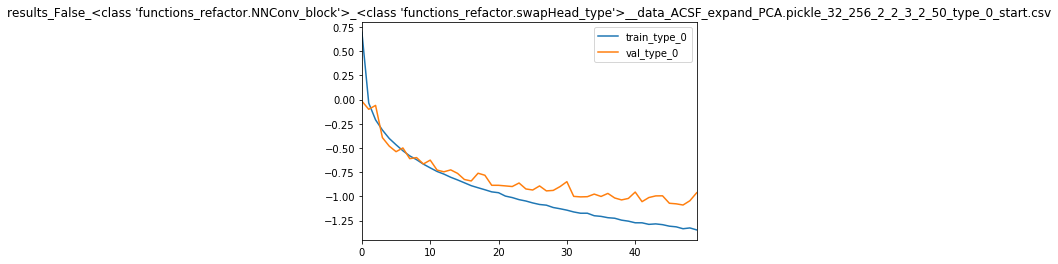

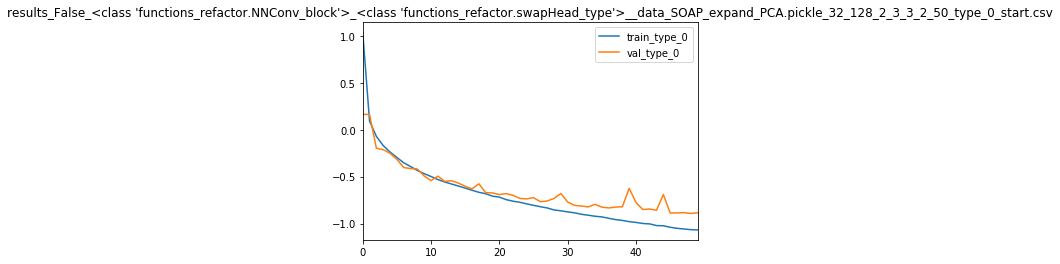

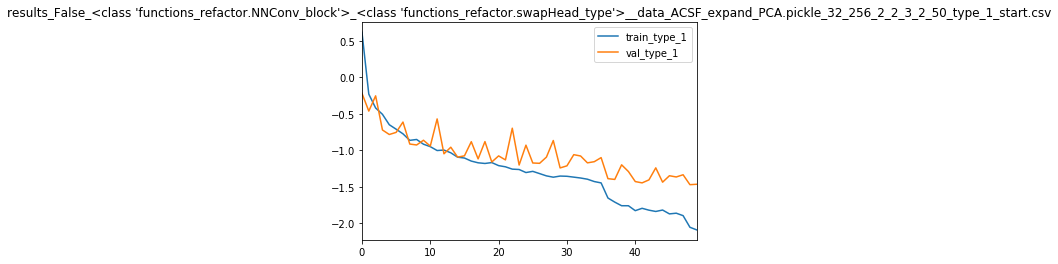

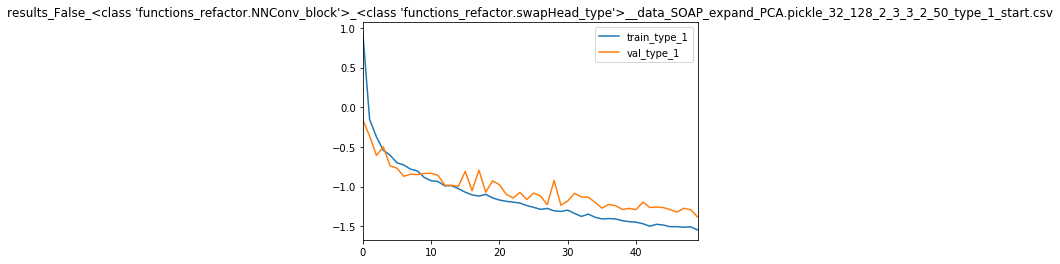

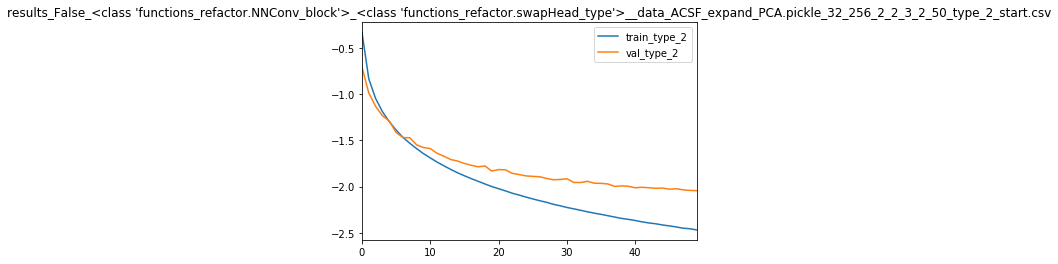

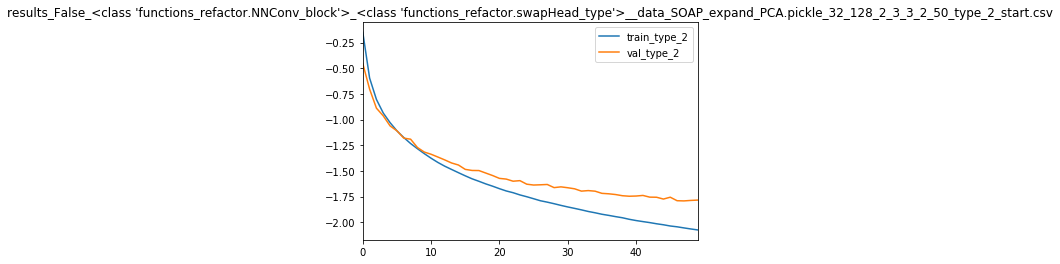

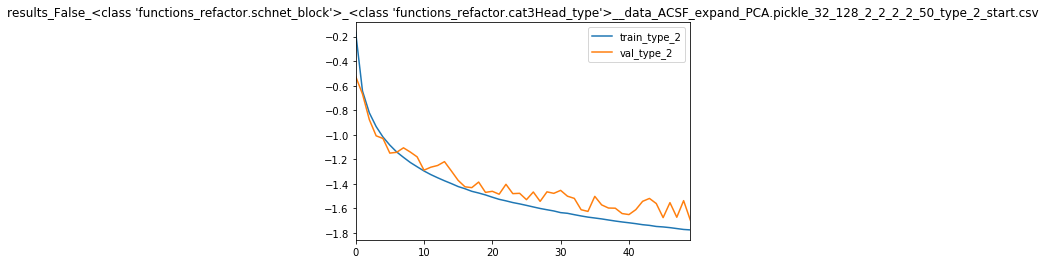

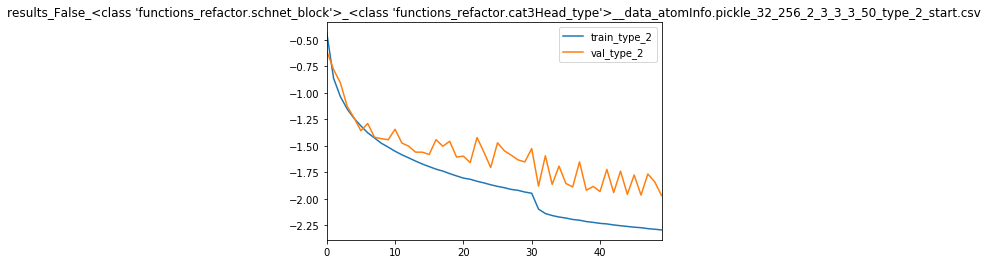

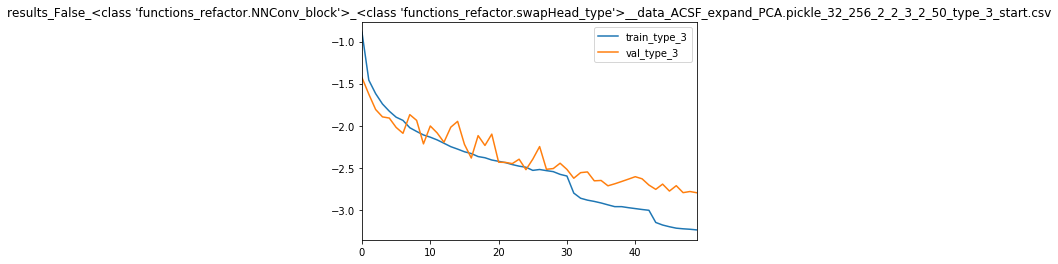

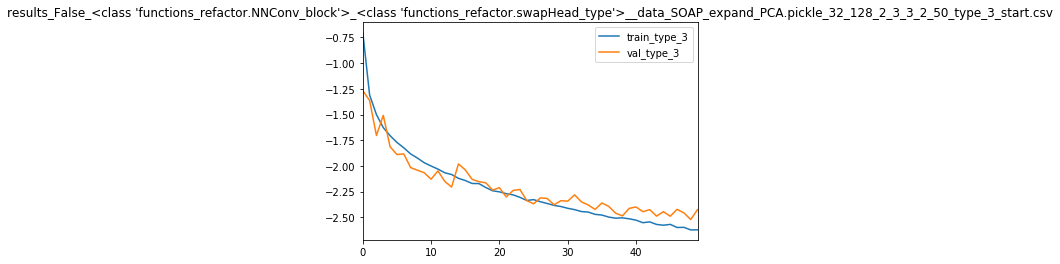

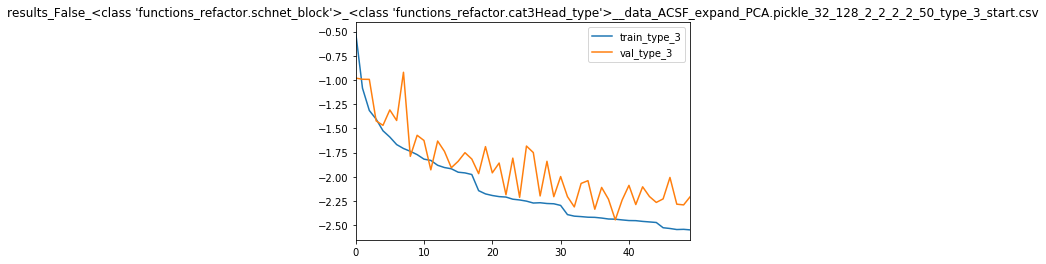

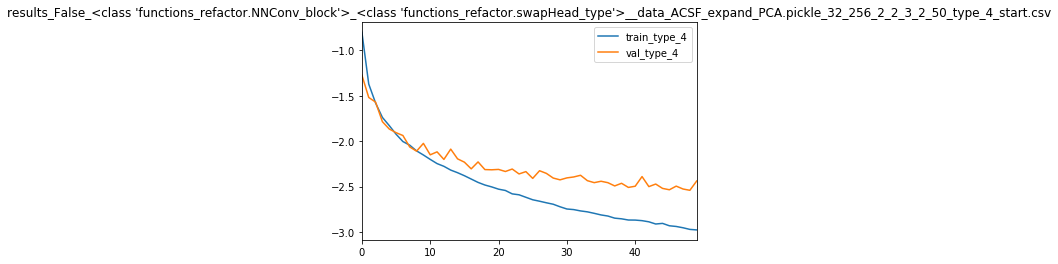

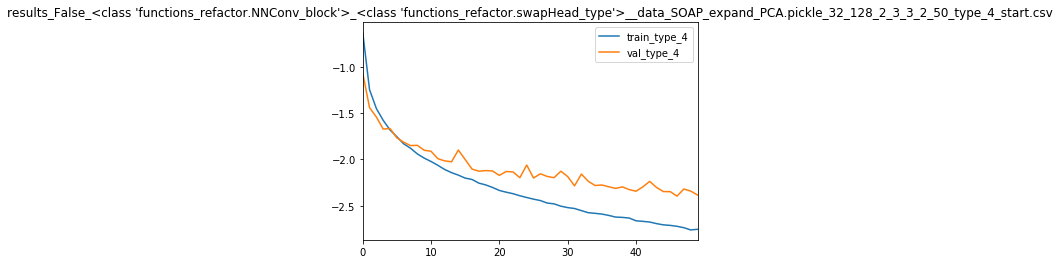

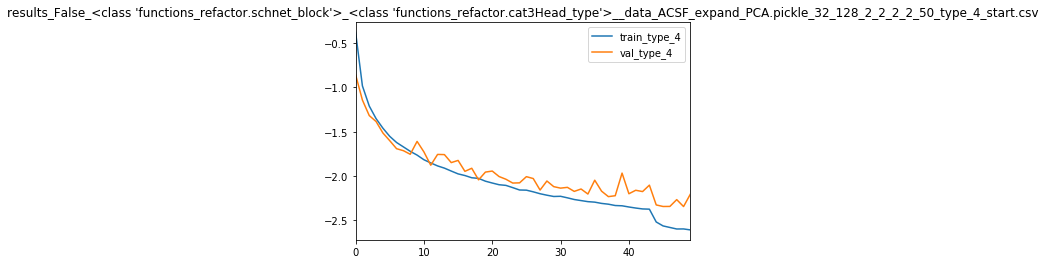

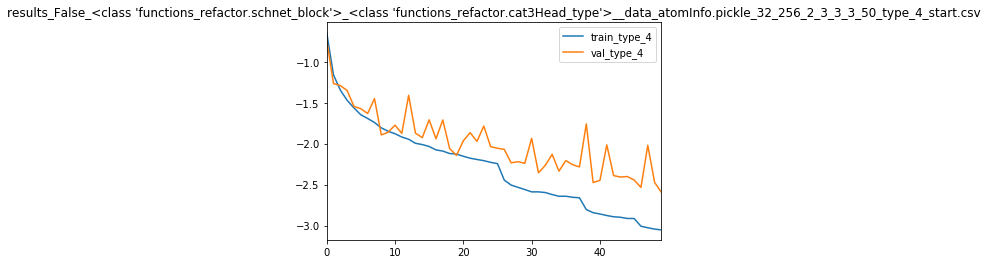

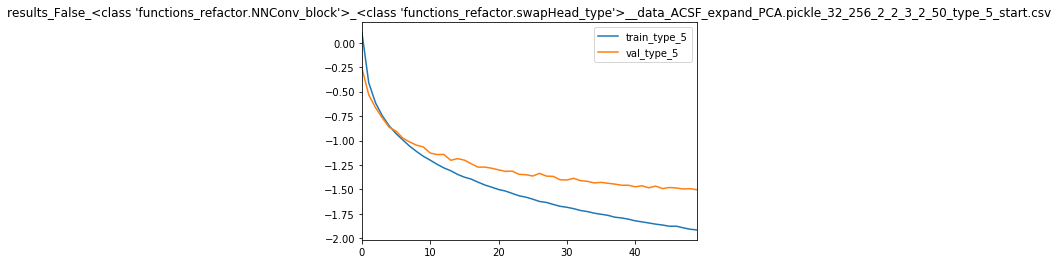

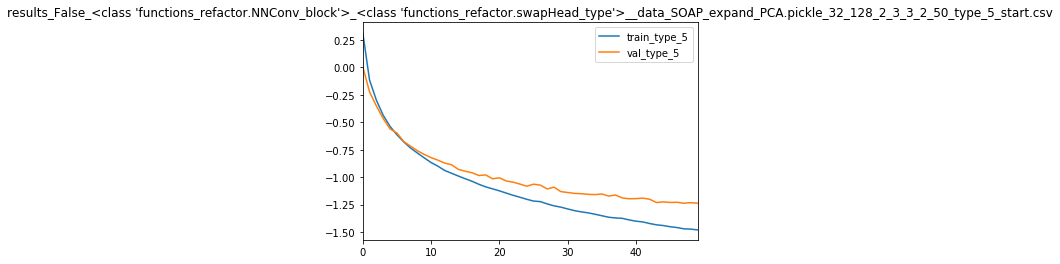

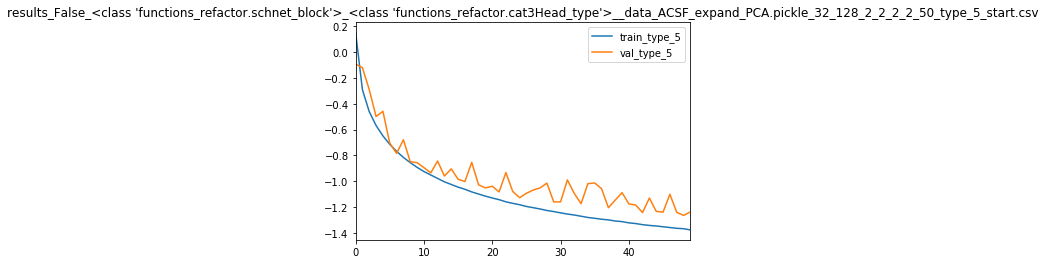

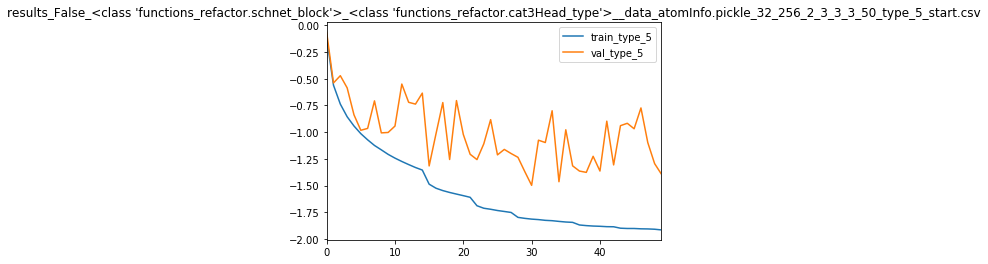

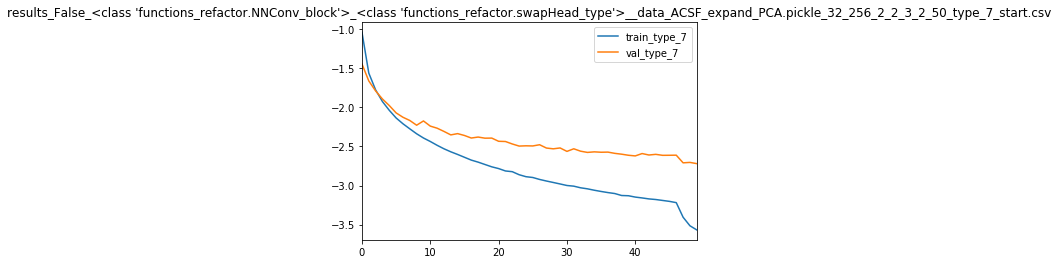

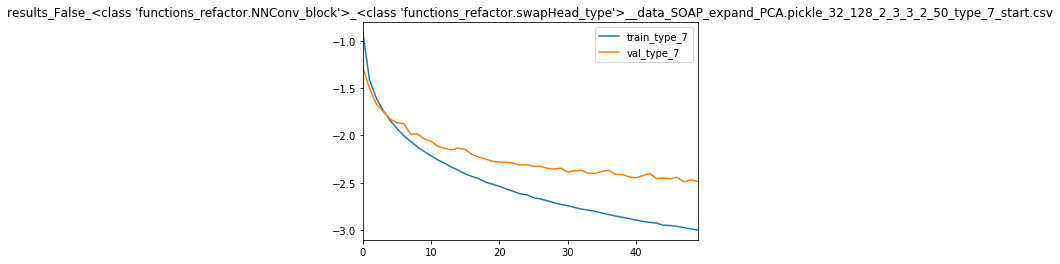

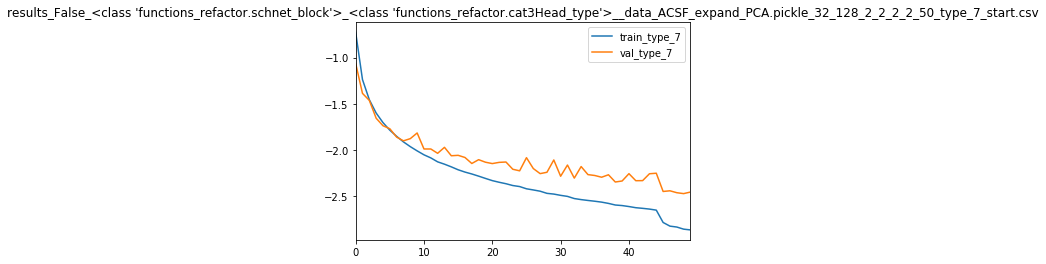

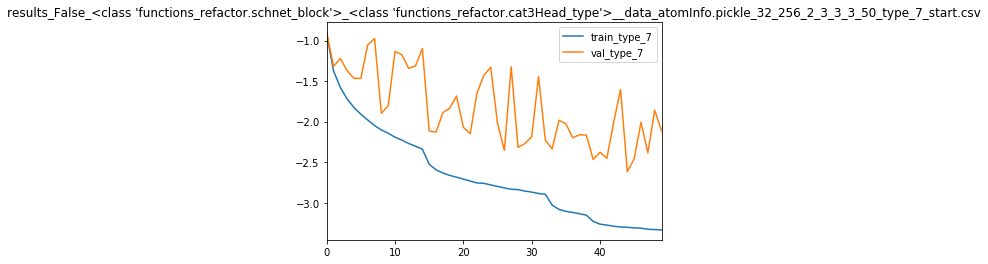

In [8]:
for name,group in gb:
    group[['train_type_'+name[0],'val_type_'+name[0]]].reset_index(drop=True).plot(title=name[1])
    plt.show()